# Pruning throught Cost Complexity

## Importing data

In [1]:
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from sklearn.tree import DecisionTreeClassifier

In [2]:
train = pd.read_csv('/home/frenk/Documenti/Artificial Intelligence/UCI_HAR_Dataset/train.csv')
test = pd.read_csv('/home/frenk/Documenti/Artificial Intelligence/UCI_HAR_Dataset/test.csv')

In [3]:
X_train = train.drop(['subject', 'Activity', 'ActivityName'], axis=1)
y_train = train.ActivityName

In [4]:
X_test = test.drop(['subject', 'Activity', 'ActivityName'], axis=1)
y_test = test.ActivityName

In [5]:
labels=['LAYING', 'SITTING','STANDING','WALKING','WALKING_DOWNSTAIRS','WALKING_UPSTAIRS']

## Sarting the analysis

This pruning technique is parameterized by the cost complexity parameter, ccp_alpha. Greater values of ccp_alpha increase the number of nodes pruned. inimal cost complexity pruning recursively finds the node with the “weakest link”. 

First, we use DecisionTreeClassifier.cost_complexity_pruning_path to get an idea of what values of ccp_alpha could be appropriate

In [6]:
clf = DecisionTreeClassifier(random_state = 0)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In the following plot, the maximum effective alpha value is removed, because it is the trivial tree with only one node

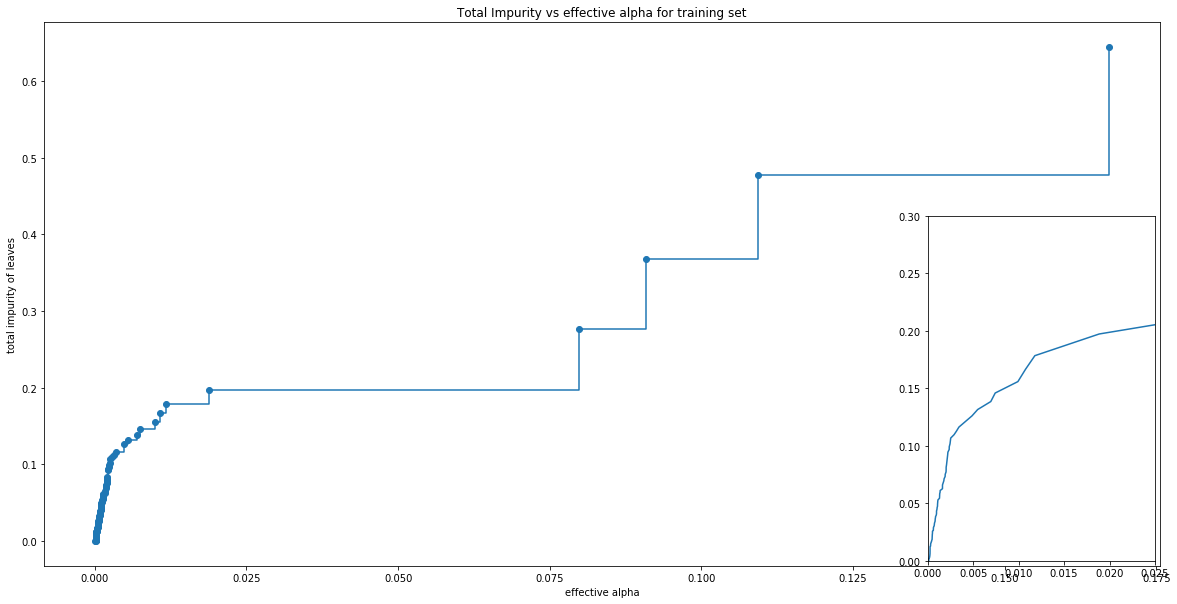

In [7]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
axins=zoomed_inset_axes(ax, 1.5, loc=4)
axins.plot(ccp_alphas[:-1], impurities[:-1])
x1, x2, y1, y2 = (0, 0.025, 0, 0.3)
axins.set_xlim(x1, x2) 
axins.set_ylim(y1, y2) 
plt.gcf().set_size_inches(20, 10)
plt.show()

Next, we train a decision tree using the effective alphas. The last value in ccp_alphas is the alpha value that prunes the whole tree, leaving the tree, clfs[-1], with one node.

In [8]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.1861382417305819


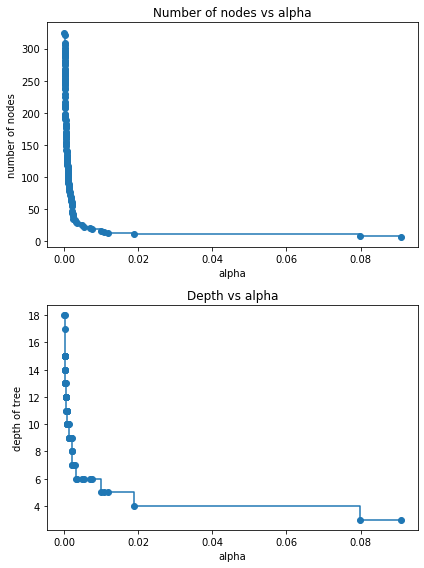

In [18]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
plt.gcf().set_size_inches(6, 8)
fig.tight_layout()

## Accuracy vs Alpha for training and testing sets

When ccp_alpha is set to zero and keeping the other default parameters of DecisionTreeClassifier, the tree overfits, leading to a 100% training accuracy. As alpha increases, more of the tree is pruned, thus creating a decision tree that generalizes better.

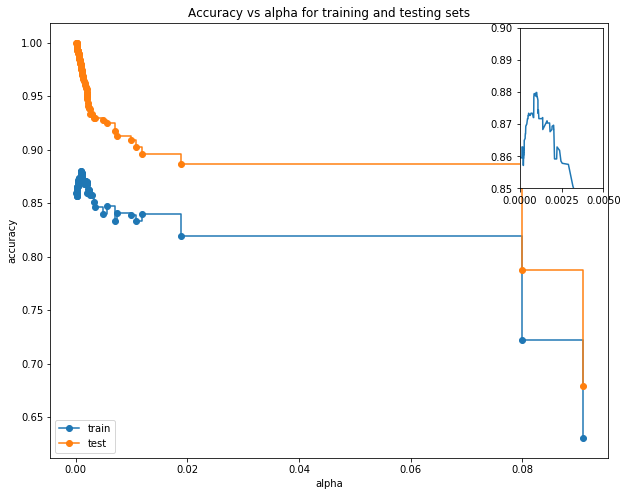

In [35]:
test_scores = [clf.score(X_test, y_test) for clf in clfs]
train_scores = [clf.score(X_train, y_train) for clf in clfs]


fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, test_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, train_scores, marker='o', label="test",
        drawstyle="steps-post")

axins=zoomed_inset_axes(ax, 3, loc=1)

axins.plot(ccp_alphas, test_scores, train_scores)
x1, x2, y1, y2 = (0, 0.005, 0.85, 0.9)
axins.set_xlim(x1, x2) 
axins.set_ylim(y1, y2) 
ax.legend(loc = 'lower left')
plt.gcf().set_size_inches(10, 8)
plt.show()

In [11]:
max_accuracy = max(test_scores)
max_index = test_scores.index(max_accuracy)
ccp_alpha_value = ccp_alphas[max_index]
train_score = train_scores[max_index]
print('best ccp_alpha value: ', ccp_alpha_value)
print(max_accuracy)
print(train_score)

best ccp_alpha value:  0.0009793253536452668
0.8798778418730913
0.9757889009793254
